# Python 2D MHD

[[  1.           6.27614237  19.79761935  47.49831439]
 [  1.           3.33333333   7.2         13.        ]
 [  1.           6.27614237  19.79761935  47.49831439]
 [  1.          12.          55.2        175.        ]
 [  1.          23.21895142 155.76454697 649.85531052]]


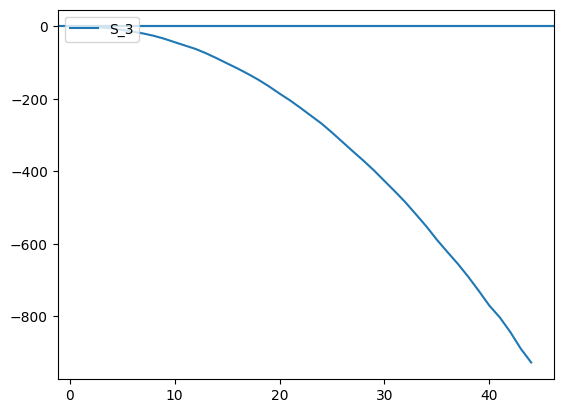

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py as hp

Mydatatype = "float64"

def structfn(ux, uy, sf):
    dux = np.zeros(Nby2, dtype=Mydatatype)
    duy = np.zeros(Nby2, dtype=Mydatatype)
    temp_arr = np.zeros(Nby2, dtype=Mydatatype)

    for lx in range(N[0]//2):
        for ly in range(N[1]//2):

            l_vec = (lx, ly)
            l_norm = np.linalg.norm(l_vec)
            l_ind = math.ceil(l_norm)

            dux = ux[lx:N[0]//2+lx, ly:N[1]//2+ly]-ux[0:N[0]//2, 0:N[1]//2]
            duy = uy[lx:N[0]//2+lx, ly:N[1]//2+ly]-uy[0:N[0]//2, 0:N[1]//2]

           # print(lx, ly, dux[0,0], duy[0,0], dux[1,1], duy[1,1])
            if (l_norm > 1e-5):
                temp_arr  =  (dux**2 + duy**2)*(dux*lx + duy*ly)/l_norm
            sf[0,l_ind]  +=  np.mean(temp_arr)

            for q in range(qmin,qmax+1):
                if (l_norm > 1e-5):
                    temp_arr  =  (dux*lx + duy*ly)/l_norm
                sf[q-qmin+1,l_ind] += np.mean(temp_arr**q)


def set_field(N, dx, dy, ux, uy):
    for i in range(N[0]):
        for j in range(N[1]):
            x = i*dx; y = j*dy
            ux[i,j] = x
            uy[i,j] = y
        #    ux[i,j] = np.sin(x)*np.cos(y)


# MAIN
N = (64, 64)
Nby2 = (N[0]//2, N[1]//2)
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 5
Qdiff_p1 = qmax-qmin+2
sf = np.zeros((Qdiff_p1, lmax))

for i in range(N[0]//2):
    for j in range(N[1]//2):
        vec = np.array([i,j])
        ind = int(math.ceil(np.linalg.norm(vec)))
        count[ind] += 1
#        print("count ", i, j, ind, count[ind])
'''
File_handle = hp.File("/home/mkv/MHD_data/2D/256_square/field_200..h5",'r')

zpx = np.fft.irfft2(np.asarray(File_handle["zpkx"]))*N[0]*N[1]
zpy = np.fft.irfft2(np.asarray(File_handle["zpkz"]))*N[0]*N[1]
zmx = np.fft.irfft2(np.asarray(File_handle["zmkx"]))*N[0]*N[1]
zmy = np.fft.irfft2(np.asarray(File_handle["zmkz"]))*N[0]*N[1]

dx = dy =  2*np.pi/N[0]
xforsf = np.arange(lmax)*dx
print(lmax)
'''
dx = dy = 1
xforsf = np.arange(lmax)*dx
ux = np.ones(N, dtype=Mydatatype)
uy = np.ones(N, dtype=Mydatatype)
set_field(N, dx, dy, ux, uy)

structfn(ux, uy, sf)
for l_loop in range(lmax):
    sf[:,l_loop] /= count[l_loop]

plt.figure()
plt.plot(xforsf[1:], -0.5*sf[0,1:]/xforsf[1:], label='S_3')
plt.axhline(y=0)
plt.axhline(y=0.1)
# for q in range(qmin,qmax+1):
#     plt.loglog(xforsf[1:], sf_p[q-qmin+1,1:], label='$q = %i$' %q)
#     plt.loglog(xforsf[1:], sf_m[q-qmin+1,1:], label='$q = %i$' %q)

plt.legend(loc = 'upper left')
plt.savefig('python_2d.png')
print( sf[:,1:5])


In [ ]:
plt.figure()
plt.plot(xforsf[1:], -0.5*sf_p[0,1:]/xforsf[1:], label='S_3p')
plt.plot(xforsf[1:], -0.5*sf_m[0,1:]/xforsf[1:], label='S_3')

# 3D Python code

[[  1.           5.38306197  18.94750587  42.55848714]
 [  1.           3.           7.          12.13636364]
 [  1.           5.38306197  18.94750587  42.55848714]
 [  1.           9.85714286  52.         149.86363636]
 [  1.          18.36557429 144.5007276  529.83409581]]


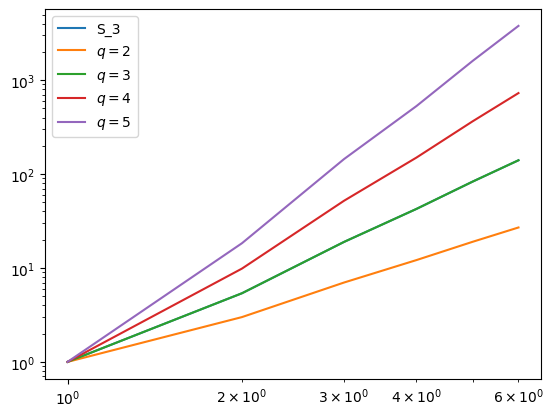

In [4]:
Mydatatype = "float64"
import numpy as np
import matplotlib.pyplot as plt
import math

def structfn(ux, uy, uz, sf):
    dux = np.zeros(Nby2, dtype=Mydatatype)
    duy = np.zeros(Nby2, dtype=Mydatatype)
    duz = np.zeros(Nby2, dtype=Mydatatype)

    temp_arr = np.zeros(Nby2, dtype=Mydatatype)

    for lx in range(N[0]//2):
        for ly in range(N[1]//2):
            for lz in range(N[2]//2):
                l_vec = (lx, ly, lz)
                l_norm = np.linalg.norm(l_vec)
                l_ind = math.ceil(l_norm)

                dux = ux[lx:N[0]//2+lx, ly:N[1]//2+ly, lz:N[2]//2+lz] \
                            -ux[0:N[0]//2, 0:N[1]//2, 0:N[2]//2]
                duy = uy[lx:N[0]//2+lx, ly:N[1]//2+ly, lz:N[2]//2+lz] \
                            -uy[0:N[0]//2, 0:N[1]//2, 0:N[2]//2]
                duz = uz[lx:N[0]//2+lx, ly:N[1]//2+ly, lz:N[2]//2+lz] \
                            -uz[0:N[0]//2, 0:N[1]//2, 0:N[2]//2]

                if (l_norm > 1e-5):
                    temp_arr  =  (dux**2 + duy**2 + duz**2) \
                                *(dux*lx + duy*ly + duz*lz)/l_norm
                sf[0,l_ind]  +=  np.mean(temp_arr)
                
                for q in range(qmin,qmax+1):
                    if (l_norm > 1e-5):
                        temp_arr  =  (dux*lx + duy*ly + duz*lz)/l_norm
                    sf[q-qmin+1,l_ind] += np.mean(temp_arr**q)


## SET FIELD

def set_field(N, dx, dy, dz, ux, uy, uz):
    for i in range(N[0]):
      for j in range(N[1]):
        for k in range(N[1]):
            x = i*dx; y = j*dy; z = k*dz
            ux[i,j,k] = x
            uy[i,j,k] = y
            uz[i,j,k] = z
        #    ux[i,j] = np.sin(x)*np.cos(y)


## MAIN

N = (8,8,8)
Nby2 = (N[0]//2, N[1]//2, N[2]//2)
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 5
Qdiff_p1 = qmax-qmin+2
sf = np.zeros((Qdiff_p1, lmax))

for i in range(N[0]//2):
    for j in range(N[1]//2):
        for k in range(N[2]//2):
            vec = np.array([i,j,k])
            ind = int(math.ceil(np.linalg.norm(vec)))
            count[ind] += 1

ux = np.ones(N, dtype=Mydatatype)
uy = np.ones(N, dtype=Mydatatype)
uz = np.ones(N, dtype=Mydatatype)

dx = dy = dz = 1
set_field(N, dx, dy, dz, ux, uy, uz)

xforsf = np.arange(lmax)*dx


structfn(ux, uy, uz, sf)
for l_loop in range(lmax):
    sf[:,l_loop] /= count[l_loop]

plt.figure()
plt.loglog(xforsf[1:], sf[0,1:], label='S_3')
for q in range(qmin,qmax+1):
    plt.loglog(xforsf[1:], sf[q-qmin+1,1:], label='$q = %i$' %q)

plt.legend(loc = 'upper left')
plt.savefig('python_3d.png')

print( sf[:,1:5])

# 2D NUMBA CUDA Python (global Mem)

In [3]:
Mydatatype = "float64"
from numba import cuda, float64, int32
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py as hp

HALF_STRUCT_FN = True  # half along each dirn
TPB = (16,16)

##CUDA kernel
@cuda.jit
def structfn(N, ux, uy, sf):

    (i,j) = cuda.grid(2)

    ux_loc = ux[i,j]
    uy_loc = uy[i,j]
    cuda.syncthreads()

    for lx in range(N[0]//2):
        for ly in range(N[1]//2):
            l_norm = math.sqrt(lx**2+ly**2)
            l_ind = int(math.ceil(l_norm))
            l = (lx, ly)
            
            ip = (i+lx) % N[0]; jp = (j+ly) % N[1]
            du_vec = (ux[ip, jp]- ux_loc, uy[ip, jp]- uy_loc)
            cuda.syncthreads()
            
            if l_norm > 1e-5:
                du_dot_l_local = (du_vec[0]*l[0]+du_vec[1]*l[1])/l_norm
                S3_element = (du_vec[0]**2+du_vec[1]**2)* du_dot_l_local
                cuda.syncthreads()

                cuda.atomic.add(sf, (0,l_ind), S3_element)
                cuda.syncthreads()

                for q in range(qmin,qmax+1):
                    cuda.atomic.add(sf, (q-qmin+1,l_ind), du_dot_l_local**q)
                    cuda.syncthreads()


def set_field(N, dx, dy, ux, uy):
    for i in range(N[0]):
        for j in range(N[1]):
            x = i*dx; y = j*dy
            ux[i,j] = x
            uy[i,j] = y
        #    ux[i,j] = np.sin(x)*np.cos(y)


# MAIN
N = (64, 64)
Nby2 = (N[0]//2, N[1]//2)
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 5
Qdiff_p1 = qmax-qmin+2
sf = np.zeros((Qdiff_p1, lmax))

for i in range(N[0]//2):
    for j in range(N[1]//2):
        vec = np.array([i,j])
        ind = int(math.ceil(np.linalg.norm(vec)))
        count[ind] += 1
#        print("count ", i, j, ind, count[ind])
'''
File_handle = hp.File("/home/mkv/MHD_data/2D/256_square/field_200..h5",'r')

zpx = np.fft.irfft2(np.asarray(File_handle["zpkx"]))*N[0]*N[1]
zpy = np.fft.irfft2(np.asarray(File_handle["zpkz"]))*N[0]*N[1]
zmx = np.fft.irfft2(np.asarray(File_handle["zmkx"]))*N[0]*N[1]
zmy = np.fft.irfft2(np.asarray(File_handle["zmkz"]))*N[0]*N[1]

dx = dy =  2*np.pi/N[0]
xforsf = np.arange(lmax)*dx
print(lmax)
'''

dx = dy = 1
xforsf = np.arange(lmax)*dx

ux = np.ones(N, dtype=Mydatatype)
uy = np.ones(N, dtype=Mydatatype)

set_field(N, dx, dy, ux, uy)

import math
if HALF_STRUCT_FN:
    BPG_x = math.ceil(N[0]/(2*TPB[0]))
    BPG_y = math.ceil(N[1]/(2*TPB[1]))
else:
    BPG_x = math.ceil(N[0]/(TPB[0]))
    BPG_y = math.ceil(N[1]/(TPB[1]))

BPG = (BPG_x, BPG_y)
print(BPG)
#Copy the arrays to the device

ux_global_mem = cuda.to_device(ux)
uy_global_mem = cuda.to_device(uy)

sf_global_mem = cuda.to_device(sf)

#start the kernel
structfn[BPG,TPB](N, ux_global_mem, uy_global_mem, sf_global_mem)

print("test")
# Copy the result back to the host
sf = sf_global_mem.copy_to_host()

if HALF_STRUCT_FN:
    factor = N[0]*N[1]/4
else:
    factor = N[0]*N[1] 

for l_loop in range(lmax):
    sf[:,l_loop] /=  (factor*count[l_loop])
#print(xforsf)
print(sf[:,1:5])


(2, 2)


/opt/conda/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


test
[[  1.           6.27614237  19.79761935  47.49831439]
 [  1.           3.33333333   7.2         13.        ]
 [  1.           6.27614237  19.79761935  47.49831439]
 [  1.          12.          55.2        175.        ]
 [  1.          23.21895142 155.76454697 649.85531052]]


# 2D NUMBA CUDA Python (Shared Mem)

In [ ]:
Mydatatype = "float64"
from numba import cuda, float64, int32
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py as hp

HALF_STRUCT_FN = True  # half along each dirn

TPB = (16, 16)
TPB2 = (TPB[0]*2, TPB[1]*2)  # double elements along each dirn, for u'
##CUDA kernel
@cuda.jit
def structfn(ux, uy, sf):

    ux_local = cuda.shared.array(TPB, dtype=Mydatatype)
    ux_p_local = cuda.shared.array(TPB2, dtype=Mydatatype) # zp_prime

    uy_local = cuda.shared.array(TPB, dtype=Mydatatype)
    uy_p_local = cuda.shared.array(TPB2, dtype=Mydatatype)

    (i,j) = cuda.grid(2)
    (tx,ty) = (cuda.threadIdx.x, cuda.threadIdx.y)

    ux_local[tx,ty] = ux[i,j]
    uy_local[tx,ty] = uy[i,j]
    cuda.syncthreads()

    if HALF_STRUCT_FN:
        dBx_max = BPG[0]; dBy_max = BPG[1]  #diff in block
    else:
        dBx_max = BPG[0]//2; dBy_max = BPG[1]//2


    for dBx in range(dBx_max):  #diff in block along x
        for dBy in range(dBy_max):
            # FILL Z' arrays
            for sx in range(2):
                for sy in range(2):
                    txprime = tx+sx*TPB[0]
                    typrime = ty+sy*TPB[1]
                    iprime = (i + (dBx+sx)*TPB[0]) % N[0]
                    jprime = (j + (dBy+sy)*TPB[1]) % N[1]

                    ux_p_local[txprime, typrime] = ux[iprime, jprime]
                    uy_p_local[txprime, typrime] = uy[iprime, jprime]

                    cuda.syncthreads()

            for local_lx in range(TPB[0]):
              for local_ly in range(TPB[1]):
                l = (local_lx + dBx*TPB[0], local_ly + dBy*TPB[1])
                l_norm = math.sqrt(l[0]**2+l[1]**2)
                l_ind = int(math.ceil(l_norm))

                du_vec = (ux_p_local[tx+local_lx, ty+local_ly]- ux_local[tx, ty], \
                            uy_p_local[tx+local_lx, ty+local_ly]- uy_local[tx, ty])
                cuda.syncthreads()

                if l_norm > 1e-5:
                    du_dot_l_local = (du_vec[0]*l[0]+ du_vec[1]*l[1])/l_norm
                    S3_element = (du_vec[0]**2+ du_vec[1]**2)* du_dot_l_local
                cuda.syncthreads()

                cuda.atomic.add(sf, (0,l_ind), S3_element)
                cuda.syncthreads()

                for q in range(qmin,qmax+1):
                    cuda.atomic.add(sf, (q-qmin+1,l_ind), du_dot_l_local**q)
                    cuda.syncthreads()


def set_field(N, dx, dy, ux, uy):
    for i in range(N[0]):
        for j in range(N[1]):
            x = i*dx; y = j*dy
            ux[i,j] = x
            uy[i,j] = y
        #    ux[i,j] = np.sin(x)*np.cos(y)


# MAIN
N = (64, 64)
Nby2 = (N[0]//2, N[1]//2)
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 5
Qdiff_p1 = qmax-qmin+2
sf = np.zeros((Qdiff_p1, lmax))

for i in range(N[0]//2):
    for j in range(N[1]//2):
        vec = np.array([i,j])
        ind = int(math.ceil(np.linalg.norm(vec)))
        count[ind] += 1
#        print("count ", i, j, ind, count[ind])
'''
File_handle = hp.File("/home/mkv/MHD_data/2D/256_square/field_200..h5",'r')

zpx = np.fft.irfft2(np.asarray(File_handle["zpkx"]))*N[0]*N[1]
zpy = np.fft.irfft2(np.asarray(File_handle["zpkz"]))*N[0]*N[1]
zmx = np.fft.irfft2(np.asarray(File_handle["zmkx"]))*N[0]*N[1]
zmy = np.fft.irfft2(np.asarray(File_handle["zmkz"]))*N[0]*N[1]

dx = dy =  2*np.pi/N[0]
xforsf = np.arange(lmax)*dx
print(lmax)
'''

dx = dy = 1
xforsf = np.arange(lmax)*dx

ux = np.ones(N, dtype=Mydatatype)
uy = np.ones(N, dtype=Mydatatype)

set_field(N, dx, dy, ux, uy)

import math
if HALF_STRUCT_FN:
    BPG_x = math.ceil(N[0]/(2*TPB[0]))
    BPG_y = math.ceil(N[1]/(2*TPB[1]))
else:
    BPG_x = math.ceil(N[0]/(TPB[0]))
    BPG_y = math.ceil(N[1]/(TPB[1]))

BPG = (BPG_x, BPG_y)
print(BPG)
#Copy the arrays to the device

ux_global_mem = cuda.to_device(ux)
uy_global_mem = cuda.to_device(uy)

sf_global_mem = cuda.to_device(sf)

#start the kernel
structfn[BPG,TPB](ux_global_mem, uy_global_mem, sf_global_mem)

print("test")
# Copy the result back to the host
sf = sf_global_mem.copy_to_host()

if HALF_STRUCT_FN:
    factor = N[0]*N[1]/4
else:
    factor = N[0]*N[1] 

for l_loop in range(lmax):
    sf[:,l_loop] /=  (factor*count[l_loop])
#print(xforsf)
print(sf[:,1:5])



In [2]:
Mydatatype = "float64"
from numba import cuda, float64, int32
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py as hp

HALF_STRUCT_FN = False  # half along each dirn

TPB = (16, 16)
TPB2 = (TPB[0]*2, TPB[1]*2)  # double elements along each dirn, for u'
##CUDA kernel
@cuda.jit
def structfn(zpx, zpy, zmx, zmy, sf_p, sf_m):

    zpx_local = cuda.shared.array(TPB, dtype=Mydatatype)
    zp_p_x_local = cuda.shared.array(TPB2, dtype=Mydatatype) # zp_prime

    zpy_local = cuda.shared.array(TPB, dtype=Mydatatype)
    zp_p_y_local = cuda.shared.array(TPB2, dtype=Mydatatype)

    zmx_local = cuda.shared.array(TPB, dtype=Mydatatype)
    zm_p_x_local = cuda.shared.array(TPB2, dtype=Mydatatype) # zp_prime

    zmy_local = cuda.shared.array(TPB, dtype=Mydatatype)
    zm_p_y_local = cuda.shared.array(TPB2, dtype=Mydatatype)

    (i,j) = cuda.grid(2)
    (tx,ty) = (cuda.threadIdx.x, cuda.threadIdx.y)

    # local_r = (cuda.threadIdx.x, cuda.threadIdx.y) #(x,y) in C
    # block_id = (cuda.blockIdx.x, cuda.blockIdx.y)
    # global_r = (cuda.blockIdx.x*TPB[0]+cuda.threadIdx.x, \
    #           cuda.blockIdx.y*TPB[1]+cuda.threadIdx.y)

    zpx_local[tx,ty] = zpx[i,j]
    zpy_local[tx,ty] = zpy[i,j]
    zmx_local[tx,ty] = zmx[i,j]
    zmy_local[tx,ty] = zmy[i,j]
    cuda.syncthreads()

    if HALF_STRUCT_FN:
        dBx_max = BPG[0]; dBy_max = BPG[1]  #diff in block
    else:
        dBx_max = BPG[0]//2; dBy_max = BPG[1]//2


    for dBx in range(dBx_max):  #diff in block along x
        for dBy in range(dBy_max):
            iprime = (i + dBx*TPB[0]) % N[0]
            jprime = (j + dBy*TPB[1]) % N[1]

            iprime_plus = (i + (dBx+1)* TPB[0]) % N[0]
            jprime_plus = (j + (dBy+1)* TPB[1]) % N[1]

            zp_p_x_local[tx,ty] = zpx[iprime, jprime]
            zp_p_x_local[tx+ TPB[0], ty] = zpx[iprime_plus, jprime]
            zp_p_x_local[tx, ty+ TPB[1]] = zpx[iprime, jprime_plus]
            zp_p_x_local[tx+ TPB[0], ty+ TPB[1]] = zpx[iprime_plus, jprime_plus]

            zp_p_y_local[tx,ty] = zpy[iprime, jprime]
            zp_p_y_local[tx+ TPB[0], ty] = zpy[iprime_plus, jprime]
            zp_p_y_local[tx, ty+ TPB[1]] = zpy[iprime, jprime_plus]
            zp_p_y_local[tx+ TPB[0], ty+ TPB[1]] = zpy[iprime_plus, jprime_plus]

            zm_p_x_local[tx,ty] = zmx[iprime, jprime]
            zm_p_x_local[tx+ TPB[0], ty] = zmx[iprime_plus, jprime]
            zm_p_x_local[tx, ty+ TPB[1]] = zmx[iprime, jprime_plus]
            zm_p_x_local[tx+ TPB[0], ty+ TPB[1]] = zmx[iprime_plus, jprime_plus]

            zm_p_y_local[tx,ty] = zmy[iprime, jprime]
            zm_p_y_local[tx+ TPB[0], ty] = zmy[iprime_plus, jprime]
            zm_p_y_local[tx, ty+ TPB[1]] = zmy[iprime, jprime_plus]
            zm_p_y_local[tx+ TPB[0], ty+ TPB[1]] = zmy[iprime_plus, jprime_plus]
            cuda.syncthreads()

            for local_lx in range(TPB[0]):
              for local_ly in range(TPB[1]):
                l = (local_lx + dBx*TPB[0], local_ly + dBy*TPB[1])
                l_norm = math.sqrt(l[0]**2+l[1]**2)
                l_ind = int(math.ceil(l_norm))

                dzp_vec = (zp_p_x_local[tx+local_lx, ty+local_ly]- zpx_local[tx, ty], \
                            zp_p_y_local[tx+local_lx, ty+local_ly]- zpy_local[tx, ty])
                dzm_vec = (zm_p_x_local[tx+local_lx, ty+local_ly]- zmx_local[tx, ty], \
                            zm_p_y_local[tx+local_lx, ty+local_ly]- zmy_local[tx, ty])
                cuda.syncthreads()

                if l_norm > 1e-5:
                    dzp_dot_l_local = (dzp_vec[0]*l[0]+dzp_vec[1]*l[1])/l_norm
                    dzm_dot_l_local = (dzm_vec[0]*l[0]+dzm_vec[1]*l[1])/l_norm

                    S3p_element = (dzp_vec[0]**2+dzp_vec[1]**2)* dzm_dot_l_local
                    S3m_element = (dzm_vec[0]**2+dzm_vec[1]**2)* dzp_dot_l_local
                cuda.syncthreads()

                cuda.atomic.add(sf_p, (0,l_ind), S3p_element)
                cuda.syncthreads()

                cuda.atomic.add(sf_m, (0,l_ind), S3m_element)
                cuda.syncthreads()

                for q in range(qmin,qmax+1):
                    cuda.atomic.add(sf_p, (q-qmin+1,l_ind), dzp_dot_l_local**q)
                    cuda.syncthreads()

                for q in range(qmin,qmax+1):
                    cuda.atomic.add(sf_m, (q-qmin+1,l_ind), dzm_dot_l_local**q)
                    cuda.syncthreads()


def set_field(N, dx, dy, zpx, zpy, zmx, zmy):
    for i in range(N[0]):
        for j in range(N[1]):
            x = i*dx; y = j*dy
            zpx[i,j] = zmx[i,j] = i*dx
            zpy[i,j] = zmy[i,j] = j*dy
        #    ux[i,j] = np.sin(x)*np.cos(y)


# MAIN
#cuda.select_device(0)  # Select the first GPU
#device = cuda.current_context().device
#print(f"Using GPU: {device.name}")
#print(f"Total shared memory per block: {device.MAX_SHARED_MEMORY_PER_BLOCK}")

N = (1024, 1024)

normalization_const =  TPB[0]*TPB[1]
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 3
Qdiff_p1 = qmax-qmin+2
sf_p = np.zeros((Qdiff_p1, lmax))
sf_m = np.zeros((Qdiff_p1, lmax))

for i in range(N[0]//2):
    for j in range(N[1]//2):
        vec = np.array([i,j])
        ind = int(math.ceil(np.linalg.norm(vec)))
        count[ind] += 1


####### Read the data ##########

#File_handle = hp.File("/home/mkv/MHD_data/2D/256_square/field_200..h5",'r')
File_handle = hp.File("/home/mkv/MHD_data/2D/1024_square/field_51..h5",'r')
zpx = np.fft.irfft2(np.asarray(File_handle["zpkx"]))*N[0]*N[1]
zpy = np.fft.irfft2(np.asarray(File_handle["zpkz"]))*N[0]*N[1]
zmx = np.fft.irfft2(np.asarray(File_handle["zmkx"]))*N[0]*N[1]
zmy = np.fft.irfft2(np.asarray(File_handle["zmkz"]))*N[0]*N[1]

dx = dy = 2*np.pi/N[0]
xforsf = np.arange(lmax)*dx

'''
zpx = np.ones(N, dtype=Mydatatype)
zpy = np.ones(N, dtype=Mydatatype)
zmx = np.ones(N, dtype=Mydatatype)
zmy = np.ones(N, dtype=Mydatatype)

set_field(N, dx, dy, zpx, zpy, zmx, zmy)
'''

import math
if HALF_STRUCT_FN:
    BPG_x = math.ceil(N[0]/(2*TPB[0]))
    BPG_y = math.ceil(N[1]/(2*TPB[1]))
else:
    BPG_x = math.ceil(N[0]/(TPB[0]))
    BPG_y = math.ceil(N[1]/(TPB[1]))

BPG = (BPG_x, BPG_y)
print(BPG)
#Copy the arrays to the device
zpx_global_mem = cuda.to_device(zpx)
zpy_global_mem = cuda.to_device(zpy)
sf_p_global_mem = cuda.to_device(sf_p)

zmx_global_mem = cuda.to_device(zmx)
zmy_global_mem = cuda.to_device(zmy)
sf_m_global_mem = cuda.to_device(sf_m)

#start the kernel
structfn[BPG,TPB](zpx_global_mem, zpy_global_mem, zmx_global_mem, zmy_global_mem, \
                    sf_p_global_mem, sf_m_global_mem)

# Copy the result back to the host
sf_p = sf_p_global_mem.copy_to_host()
sf_m = sf_m_global_mem.copy_to_host()
factor = N[0]*N[1]/4
#print("before = ",sf[2,:])
for l_loop in range(lmax):
    sf_p[:,l_loop] /= (BPG[0]*BPG[1]*normalization_const*count[l_loop])
    sf_m[:,l_loop] /= (BPG[0]*BPG[1]*normalization_const*count[l_loop])
#print(xforsf)
#print(sf[0,:])


plt.figure()
plt.semilogx(xforsf[1:], -0.5*sf_p[0,1:]/xforsf[1:], label='S_3p')
plt.semilogx(xforsf[1:], -0.5*sf_m[0,1:]/xforsf[1:], label='S_3')
plt.axhline(y=0)
plt.axhline(y=0.1)
# for q in range(qmin,qmax+1):
#     plt.loglog(xforsf[1:], sf_p[q-qmin+1,1:], label='$q = %i$' %q)
#     plt.loglog(xforsf[1:], sf_m[q-qmin+1,1:], label='$q = %i$' %q)

plt.legend(loc = 'upper left')
plt.savefig('numba2_new.png')
print( sf_p[0,1:5],  sf_m[0,1:5])
# print( sf_p[1,:], sf_p[2,:], sf_m[1,:], sf_m[2,:])

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/mkv/MHD_data/2D/1024_square/field_51..h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
print( sf_p[0,1:5],  sf_m[0,1:5])

# 3D NUMBA CUDA (Global Mem)

In [2]:
Mydatatype = "float64"
from numba import cuda, float64, int32
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py as hp

HALF_STRUCT_FN = True  # half along each dirn

TPB = (4,4,4)

##CUDA kernel
@cuda.jit
def structfn(N, ux, uy, uz, sf):

    (i,j,k) = cuda.grid(3)
    (tx,ty,tz) = (cuda.threadIdx.x, cuda.threadIdx.y,  cuda.threadIdx.z)

    ux_loc = ux[i,j,k]
    uy_loc = uy[i,j,k]
    uz_loc = uz[i,j,k]
    cuda.syncthreads()

    for lx in range(N[0]//2):
        for ly in  range(N[1]//2):
            for lz in range(N[2]//2):
                l_norm = math.sqrt(lx**2+ ly**2+ lz**2)
                l_ind = int(math.ceil(l_norm))
                du_vec = (ux[i+lx,j+ly,k+lz]- ux_loc, uy[i+lx,j+ly,k+lz]- uy_loc, \
                           uz[i+lx,j+ly,k+lz]- uz_loc)
                cuda.syncthreads()

                if l_norm > 1e-5:
                    du_dot_l = (du_vec[0]*lx+ du_vec[1]*ly+ du_vec[2]*lz)/l_norm
                    S3_loc = (du_vec[0]**2+ du_vec[1]**2+ du_vec[2]**2)*du_dot_l
                cuda.syncthreads()

                cuda.atomic.add(sf, (0,l_ind), S3_loc)
                cuda.syncthreads()

                for q in range(qmin,qmax+1):
                    cuda.atomic.add(sf, (q-qmin+1,l_ind), du_dot_l**q)
                    cuda.syncthreads()


## SET FIELD

def set_field(N, dx, dy, dz, ux, uy, uz):
    for i in range(N[0]):
      for j in range(N[1]):
        for k in range(N[2]):
            x = i*dx; y = j*dy; z = k*dz
            ux[i,j,k] = x
            uy[i,j,k] = y
            uz[i,j,k] = z
        #    ux[i,j] = np.sin(x)*np.cos(y)


## MAIN

N = (8,8,8)
Nby2 = (N[0]//2, N[1]//2, N[2]//2)
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 5
Qdiff_p1 = qmax-qmin+2
sf = np.zeros((Qdiff_p1, lmax))

print(N, lmax)
for i in range(N[0]//2):
    for j in range(N[1]//2):
        for k in range(N[2]//2):
            vec = np.array([i,j,k])
            ind = int(math.ceil(np.linalg.norm(vec)))
            count[ind] += 1

ux = np.ones(N, dtype=Mydatatype)
uy = np.ones(N, dtype=Mydatatype)
uz = np.ones(N, dtype=Mydatatype)

dx = dy = dz = 1
set_field(N, dx, dy, dz, ux, uy, uz)

xforsf = np.arange(lmax)*dx

ux = np.ones(N, dtype=Mydatatype)
uy = np.ones(N, dtype=Mydatatype)
uz = np.ones(N, dtype=Mydatatype)

dx = dy = dz = 1
set_field(N, dx, dy, dz, ux, uy, uz)

xforsf = np.arange(lmax)*dx
'''
File_handle = hp.File("/home/mkv/MHD_data/3D/256_cube/field_50..h5",'r')
zpx = np.fft.irfft2(np.asarray(File_handle["zpkx"]))*N[0]*N[1]*N[2]
zpy = np.fft.irfft2(np.asarray(File_handle["zpky"]))*N[0]*N[1]*N[2]
zpz = np.fft.irfft2(np.asarray(File_handle["zpkz"]))*N[0]*N[1]*N[2]

zmx = np.fft.irfft2(np.asarray(File_handle["zmkx"]))*N[0]*N[1]*N[2]
zmy = np.fft.irfft2(np.asarray(File_handle["zmky"]))*N[0]*N[1]*N[2]
zmz = np.fft.irfft2(np.asarray(File_handle["zmkz"]))*N[0]*N[1]*N[2]

dx = dy = dz = 2*np.pi/N[0]
'''

import math
if HALF_STRUCT_FN:
    BPG_x = math.ceil(N[0]/(2*TPB[0]))
    BPG_y = math.ceil(N[1]/(2*TPB[1]))
    BPG_z = math.ceil(N[2]/(2*TPB[2]))
else:
    BPG_x = math.ceil(N[0]/(TPB[0]))
    BPG_y = math.ceil(N[1]/(TPB[1]))
    BPG_z = math.ceil(N[2]/(2*TPB[2]))

BPG = (BPG_x, BPG_y, BPG_z)
print(BPG)
#Copy the arrays to the device

ux_global_mem = cuda.to_device(ux)
uy_global_mem = cuda.to_device(uy)
uz_global_mem = cuda.to_device(uz)

sf_global_mem = cuda.to_device(sf)

#start the kernel
structfn[BPG,TPB](N, ux_global_mem, uy_global_mem, uz_global_mem,
                    sf_global_mem)


# Copy the result back to the host
sf = sf_global_mem.copy_to_host()

if HALF_STRUCT_FN:
    factor = N[0]*N[1]*N[2]/8
else:
    factor = N[0]*N[1]*N[2] 

for l_loop in range(lmax):
    sf[:,l_loop] /=  (factor*count[l_loop])
#print(xforsf)
print(sf[:,1:5])

(8, 8, 8) 7
(1, 1, 1)


/opt/conda/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


[[  1.           5.38306197  18.94750587  42.55848714]
 [  1.           3.           7.          12.13636364]
 [  1.           5.38306197  18.94750587  42.55848714]
 [  1.           9.85714286  52.         149.86363636]
 [  1.          18.36557429 144.5007276  529.83409581]]


# 3D NUMBA CUDA (Shared Mem)

In [14]:
Mydatatype = "float64"
from numba import cuda, float64, float32, int32
import numpy as np
import matplotlib.pyplot as plt
import math

HALF_STRUCT_FN = True  # half along each dirn

TPB = (4,4,4)
TPB2 = (TPB[0]*2, TPB[1]*2, TPB[2]*2)  # double elements along each dirn, for u'

##CUDA kernel
@cuda.jit
def structfn(ux, uy, uz, sf):

 #   print("in fn  0= ",  np.shape(sf_p))

    ux_local = cuda.shared.array(TPB, dtype=Mydatatype)
    ux_p_local = cuda.shared.array(TPB2, dtype=Mydatatype) # ux_prime

    uy_local = cuda.shared.array(TPB, dtype=Mydatatype)
    uy_p_local = cuda.shared.array(TPB2, dtype=Mydatatype)  
    
    uz_local = cuda.shared.array(TPB, dtype=Mydatatype)
    uz_p_local = cuda.shared.array(TPB2, dtype=Mydatatype)  
 

    (i,j,k) = cuda.grid(3)
    (tx,ty,tz) = (cuda.threadIdx.x, cuda.threadIdx.y,  cuda.threadIdx.z)

    
    ux_local[tx,ty,tz] = ux[i,j,k]
    uy_local[tx,ty,tz] = uy[i,j,k]
    uz_local[tx,ty,tz] = uz[i,j,k]
    cuda.syncthreads()

    if HALF_STRUCT_FN:
        dBx_max = BPG[0]; dBy_max = BPG[1]; dBz_max = BPG[1]  #diff in block
    else:
        dBx_max = BPG[0]//2; dBy_max = BPG[1]//2; dBz_max = BPG[1]//2

#     # if (tx,ty, tz) ==(0,0,0):
#     #    print(dBx_max, dBy_max, dBz_max)

    for dBx in range(dBx_max):  #diff in block along x
      for dBy in range(dBy_max):
        for dBz in range(dBz_max):
            # FILL Z' arrays
            for sx in range(2):
              for sy in range(2):
                for sz in range(2):
                    txprime = tx+sx*TPB[0]
                    typrime = ty+sy*TPB[1]
                    tzprime = tz+sz*TPB[2]
                    iprime = (i + (dBx+sx)*TPB[0]) % N[0]
                    jprime = (j + (dBy+sy)*TPB[1]) % N[1]
                    kprime = (k + (dBz+sz)*TPB[2]) % N[2]

                    ux_p_local[txprime, typrime, tzprime] = ux[iprime, jprime, kprime]
                    uy_p_local[txprime, typrime, tzprime] = uy[iprime, jprime, kprime]
                    uz_p_local[txprime, typrime, tzprime] = uz[iprime, jprime, kprime]
                    cuda.syncthreads()


            for local_lx in range(TPB[0]):
              for local_ly in range(TPB[1]):
                for local_lz in range(TPB[2]):
                    l = (local_lx + dBx*TPB[0], local_ly + dBy*TPB[1], local_lz + dBz*TPB[2])
                    l_norm = math.sqrt(l[0]**2+ l[1]**2 + l[2]**2)
                    l_ind = int(math.ceil(l_norm))

                    du_vec = (ux_p_local[tx+local_lx, ty+local_ly, tz+local_lz]- ux_p_local[tx, ty, tz], \
                              uy_p_local[tx+local_lx, ty+local_ly, tz+local_lz]- uy_p_local[tx, ty, tz], \
                              uz_p_local[tx+local_lx, ty+local_ly, tz+local_lz]- uz_p_local[tx, ty, tz])
                    cuda.syncthreads()

                    if l_norm > 1e-5:
                        du_dot_l_local = (du_vec[0]*l[0]+ du_vec[1]*l[1]+ du_vec[2]*l[2])/l_norm
                        S3_element = (du_vec[0]**2+ du_vec[1]**2+ du_vec[1]**2)* du_dot_l_local
                    cuda.syncthreads()

                    cuda.atomic.add(sf, (0,l_ind), S3_element)
                    cuda.syncthreads()

                    for q in range(qmin,qmax+1):
                        cuda.atomic.add(sf, (q-qmin+1,l_ind), du_dot_l_local**q)
                        cuda.syncthreads()

## SET FIELD


def set_field(N, dx, dy, dz, ux, uy, uz):
    for i in range(N[0]):
      for j in range(N[1]):
        for k in range(N[2]):
            x = i*dx; y = j*dy; z = k*dz
            ux[i,j,k] = x
            uy[i,j,k] = y
            uz[i,j,k] = z
        #    ux[i,j] = np.sin(x)*np.cos(y)

## MAIN

N = (8,8,8)
Nby2 = (N[0]//2, N[1]//2, N[2]//2)
lmax = math.ceil(np.linalg.norm(N))//2
count = np.zeros(lmax, dtype=int)
qmin = 2
qmax = 5
Qdiff_p1 = qmax-qmin+2
sf = np.zeros((Qdiff_p1, lmax))

print(N, lmax)
for i in range(N[0]//2):
    for j in range(N[1]//2):
        for k in range(N[2]//2):
            vec = np.array([i,j,k])
            ind = int(math.ceil(np.linalg.norm(vec)))
            count[ind] += 1

ux = np.ones(N, dtype=Mydatatype)
uy = np.ones(N, dtype=Mydatatype)
uz = np.ones(N, dtype=Mydatatype)

dx = dy = dz = 1
set_field(N, dx, dy, dz, ux, uy, uz)

xforsf = np.arange(lmax)*dx

ux = np.ones(N, dtype=Mydatatype)
uy = np.ones(N, dtype=Mydatatype)
uz = np.ones(N, dtype=Mydatatype)

dx = dy = dz = 1
set_field(N, dx, dy, dz, ux, uy, uz)

xforsf = np.arange(lmax)*dx
'''
File_handle = hp.File("/home/mkv/MHD_data/3D/256_cube/field_50..h5",'r')
zpx = np.fft.irfft2(np.asarray(File_handle["zpkx"]))*N[0]*N[1]*N[2]
zpy = np.fft.irfft2(np.asarray(File_handle["zpky"]))*N[0]*N[1]*N[2]
zpz = np.fft.irfft2(np.asarray(File_handle["zpkz"]))*N[0]*N[1]*N[2]

zmx = np.fft.irfft2(np.asarray(File_handle["zmkx"]))*N[0]*N[1]*N[2]
zmy = np.fft.irfft2(np.asarray(File_handle["zmky"]))*N[0]*N[1]*N[2]
zmz = np.fft.irfft2(np.asarray(File_handle["zmkz"]))*N[0]*N[1]*N[2]

dx = dy = dz = 2*np.pi/N[0]
'''

import math
if HALF_STRUCT_FN:
    BPG_x = math.ceil(N[0]/(2*TPB[0]))
    BPG_y = math.ceil(N[1]/(2*TPB[1]))
    BPG_z = math.ceil(N[2]/(2*TPB[2]))
else:
    BPG_x = math.ceil(N[0]/(TPB[0]))
    BPG_y = math.ceil(N[1]/(TPB[1]))
    BPG_z = math.ceil(N[2]/(2*TPB[2]))

BPG = (BPG_x, BPG_y, BPG_z)
print(BPG)
#Copy the arrays to the device

ux_global_mem = cuda.to_device(ux)
uy_global_mem = cuda.to_device(uy)
uz_global_mem = cuda.to_device(uz)

sf_global_mem = cuda.to_device(sf)

#start the kernel
structfn[BPG,TPB](ux_global_mem, uy_global_mem, uz_global_mem, sf_global_mem)


# Copy the result back to the host
sf = sf_global_mem.copy_to_host()

if HALF_STRUCT_FN:
    factor = N[0]*N[1]*N[2]/8
else:
    factor = N[0]*N[1]*N[2] 

for l_loop in range(lmax):
    sf[:,l_loop] /=  (factor*count[l_loop])
#print(xforsf)
print(sf[:,1:5])

(8, 8, 8) 7
(1, 1, 1)


/opt/conda/lib/python3.10/site-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


[[  1.           5.38306197  18.94750587  42.55848714]
 [  1.           3.           7.          12.13636364]
 [  1.           5.38306197  18.94750587  42.55848714]
 [  1.           9.85714286  52.         149.86363636]
 [  1.          18.36557429 144.5007276  529.83409581]]


In [ ]:
import numpy as np
x = 2*np.sqrt(2) 
y = 3*np.sqrt(3) 
print(x*64, y*64)
print((x+8)*64*3+y*64)

# Test